# AI project – Zucchetti Spa dataset

## Preprocessing

In [880]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

UNKNOWN = 'unknown'
SAMPLE = 10

In [881]:
# Read in the data from the CSV file into a a dataframe 
df = pd.read_csv('coded_log.csv', sep=";",names=['userId', '1?', 'date','eventType','application','2?','ip','3?','4?','5?'])

In [882]:
# Visualize a snippet of the data frame df
df.sample(SAMPLE)

,userId,1?,date,eventType,application,2?,ip,3?,4?,5?
293923,10773,74571001,2021-04-26 18:24:47.000,1,HR1,NaN,NaN,001,,t6vug0yz27
63864,1389,549319526,2021-04-01 12:23:46.000,1,HRC,NaN,NaN,001,rljgehlsfk,dshvn0h6u2
124778,2463,953038603,2021-03-12 17:37:58.000,1,ERM,erm3zs02,ip_1462,001,kkypqqwjdw,gnoktn6yuq
551159,23200,898466034,2021-05-27 10:34:38.000,1,HRW,NaN,NaN,001,pqgcrgzwku,n7anp4w3h0
815340,32836,610760387,2021-05-24 22:53:11.000,1,HRW,NaN,NaN,001,pghvqsfbxt,u05jlhlr9s
731054,29318,846014039,2021-05-31 15:09:01.000,2,ERM,erm3zs02,ip_36925,,,t3g09kryw4
73094,1582,253007917,2021-05-26 19:51:54.000,3,HRW,NaN,NaN,001,tqifjfbgsr,ew5eb5bmm5
535881,22687,458196496,2021-04-28 09:00:59.000,1,ERM,erm3zs02,ip_23175,001,ezhlaucvbh,uswryszfgb
257808,9427,790684258,2021-06-24 09:17:03.000,3,ERM,erm3zs02,ip_119,001,yxyctrduvm,dk6w8n3yho
750694,30978,911472775,2021-05-07 16:33:35.000,1,TM3,NaN,NaN,001,avfretogik,h27pq593mu


In [883]:
#remove unkown coloums
df_ = df.drop(columns=['1?','2?','3?','4?','5?'])

df_.sample(SAMPLE)

,userId,date,eventType,application,ip
621088,25526,2021-03-29 10:11:33.000,1,ERM,ip_1159
841255,33324,2021-05-13 11:13:44.000,1,HRW,NaN
594943,24734,2021-06-24 10:59:29.000,1,HRW,NaN
10772,33,2020-12-15 10:36:05.000,1,ERM,ip_1
542556,22997,2020-05-04 19:17:16.000,1,HRW,NaN
317990,13212,2021-06-23 16:30:06.000,3,HRW,NaN
786982,32059,2021-04-30 08:01:15.000,1,HRW,NaN
597616,24860,2021-05-10 16:46:24.000,1,ERM,ip_27957
52407,1172,2021-06-03 14:06:22.000,1,ERM,ip_1469
489679,20415,2021-05-10 22:07:27.000,1,ERM,ip_18933


In [884]:
#cleaning row data

print('number of null entries:')
df_.isnull().sum()

number of null entries:


userId              0
date                0
eventType           0
application         0
ip             339741
dtype: int64

In [885]:
df_['ip'].fillna(UNKNOWN,inplace=True)

df_.sample(SAMPLE)

,userId,date,eventType,application,ip
634597,26057,2021-04-19 14:07:28.000,3,ERM,ip_7864
178817,3447,2021-06-28 11:04:51.000,1,ERM,ip_1468
684324,27822,2021-06-07 08:54:53.000,3,ERM,ip_1099
74381,1595,2021-04-07 16:36:49.000,1,HRW,unknown
531509,22382,2021-05-11 17:09:40.000,1,ERM,ip_4210
352325,13571,2021-04-14 13:23:50.000,2,ERM,ip_126
127504,2506,2021-06-09 01:26:15.000,1,HRW,unknown
756725,31179,2021-05-17 17:42:16.000,1,HRW,unknown
469654,20043,2021-04-13 08:16:30.000,1,HRW,unknown
509519,21475,2021-05-10 13:07:10.000,1,ERM,ip_916


### Data cleaning

In [886]:
df_['date'] = pd.to_datetime(df_['date'], format="%Y-%m-%d %H:%M:%S.%f")

# sorting by date and userId
df_.sort_values(by=["userId", "date"],ascending=(True, True),inplace=True)

#check data consistency: delete rows containing non-valid event code
df_ = df_[(df_.eventType >= 1) & (df_.eventType <= 3)]

#check data rendundancy
duplicates = df_.duplicated().sum()
if(duplicates > 0):
    print(f'Duplicates number {duplicates} on {len(df_.index)}')
    df_.drop_duplicates(inplace = True)
    print(f'New size:{len(df_.index)}')
df_

Duplicates number 3432 on 849552
New size:846120


,userId,date,eventType,application,ip
9162,1,2021-03-22 20:03:59,1,HRW,unknown
5482,1,2021-03-22 20:18:59,1,HRW,unknown
1872,1,2021-03-22 20:33:59,1,HRW,unknown
8919,1,2021-03-22 20:48:59,1,HRW,unknown
3704,1,2021-03-22 21:03:59,1,HRW,unknown
...,...,...,...,...,...
849547,33952,2021-06-23 08:45:56,1,ERM,ip_780
849548,33953,2021-06-23 08:07:16,1,ERM,ip_15260
849549,33954,2021-06-23 10:18:33,1,ERM,ip_15260
849550,33961,2021-06-24 08:58:23,1,ERM,ip_124


In [887]:
# counting unique values
userIdNumber = len(pd.unique(df_['userId']))

print(f'**** Within the dataset there are {userIdNumber} users ****')

**** Within the dataset there are 18080 users ****


In [888]:
print('##########################################')
print(f"{df_.groupby('eventType').eventType.count()}")
print('##########################################')

##########################################
eventType
1    628356
2     92058
3    125706
Name: eventType, dtype: int64
##########################################


### Utility functions

#### Constants

In [889]:
#working hours boundary
START_WORKING = 8
END_WORKING = 19
#time boundaries for series construction
AT_LEAST_ONE_DAY = 24 * 3600 * 1000 # 24 h
MAX_DELAY_ERRORS = 5 * 60 * 1000 # 5min
MAX_DELAY_SUCCESS = 5 * 60 * 1000 # 5min
#attempts boundaries
MAX_ATTEMPTS = 3
MAX_TIME_BOT = 5000 # estimate both maximum time. We consider mocking user typing
RESIDUAL_TIME = MAX_DELAY_ERRORS - MAX_TIME_BOT

#FAILED ATTEMPTS WEIGHTS
#lower then MAX_ATTEMPTS 
F_ATT_LOW_MAX_WS = 0.1 # with final sucessful attempt
F_ATT_LOW_MAX_NS = 0.5 # no final sucessful attempt
#higher then MAX_ATTEMPTS 
F_ATT_HIGH_MAX_WS = 0.7 #with final sucessful attempt
F_ATT_HIGH_MAX_NS = 0.95 #no final sucessful attempt
#higher then MAX_ATTEMPTS and lower then two times MAX_ATTEMPTS
F_ATT_HIGH_MAX_LOW_2MAX_NS = 0.7 #no final sucessful attempt

#AVERAGE TIME WEIGHTS
LOWER_THAN_BOT_TIME = 0.99 #average lower than estimate bot time
BTW_BOT_AND_DIFF = 0.85 #average higher than estimate bot time and lower than RESIDUAL_TIME
HIGHER_THAN_BOT_TIME = 0.75 #higher than estimate bot time and than RESIDUAL_TIME

#events type
FAILED_LOGIN = 2
SUCCESSFUL_LOGIN = 1
LOGOUT = 3

#weights
WORKINGTIME_WORKINGDAY = 0.25
NOT_WORKINGTIME_WEEKDAY = 0.35
WORKINGTIME_NOT_WORKINGDAY = 0.45
NOT_WORKINGTIME_NOT_WEEKDAY = 0.55

#### Weigthing function

In [890]:


def suspicious(serie):
    """
    serie[0] = "userId"
    serie[1] = "avgTime"
    serie[2] = "failedAttempts"
    serie[3] = "hasSuccess"
    serie[4] = "application"
    serie[5] = "workingTime"
    serie[6] = "day"
    serie[7] = "ipAmount"
    serie[8] = "suspicious"
    """
    
    # weights
    timeW = timeWeight(serie[6], serie[5])
    ipAmount = 1 - (1/(serie[7]) if serie[7] > 1 else 0.6) #one ip used case 
    serieW = serieWeight(serie[1], serie[2], serie[3])
    
    return graham([timeW,ipAmount,serieW[0],serieW[1]])

#graham formula to avoid underflow when multiplying small numbers
def graham(weights:list):
    mu = 0
    for w in weights:
        mu += np.log(1 - w) - np.log(w)
    return 1/(1+np.e**mu)

def timeWeight(day, isWorkingTime):
    weekDay = day in range(1,6)
    if isWorkingTime and weekDay:
        w = WORKINGTIME_WORKINGDAY
    elif not isWorkingTime and weekDay:
        w = NOT_WORKINGTIME_WEEKDAY
    elif isWorkingTime and not weekDay:
        w = WORKINGTIME_NOT_WORKINGDAY
    elif not isWorkingTime and not weekDay:
        w = NOT_WORKINGTIME_NOT_WEEKDAY
    return w


def serieWeight(avgTime, failedAttempts, hasSuccess):
    w_attempts = 0
    if hasSuccess:
        if failedAttempts <= MAX_ATTEMPTS:
            w_attempts = F_ATT_LOW_MAX_WS
        else:
            w_attempts = F_ATT_HIGH_MAX_WS
    else:
        if failedAttempts <= MAX_ATTEMPTS:
            w_attempts = F_ATT_LOW_MAX_NS
        elif failedAttempts <= 2 * MAX_ATTEMPTS:
            w_attempts = F_ATT_HIGH_MAX_LOW_2MAX_NS
        else:
            w_attempts = F_ATT_HIGH_MAX_NS
            
    w_avgtime = avgTimeWight(avgTime,failedAttempts)
    return (w_avgtime,w_attempts)

def avgTimeWight(avgTime,failedAttempts):
    w = 0
    if avgTime <= MAX_TIME_BOT:
        w = LOWER_THAN_BOT_TIME 
    elif MAX_TIME_BOT < avgTime <= RESIDUAL_TIME:
        w = BTW_BOT_AND_DIFF
    else: 
        w = HIGHER_THAN_BOT_TIME
    return w


## Dataframe login construction

#### Lambda functions

In [891]:
# deterimine if the log was dueing working hours
isWorkingTime = lambda x: 1 if (x.isoweekday() in range(1,6) and x.to_pydatetime().hour >= START_WORKING and x.to_pydatetime().hour <= END_WORKING) else 0

# toDay: convert a stirng representing a date into a number 
#    1 --> Monday
#    2 --> Tuesday
#    ...
#    7 --> Sunday
toDay = lambda x: x.isoweekday() 

In [892]:
#setting up the 1st datase
df_logins = pd.DataFrame(columns=['userId', 'date', 'day', 'workingTime', 'eventType', 'application',"ip"])
df_logins['userId'] = df_['userId']
df_logins['date'] = df_["date"]
df_logins['day'] = df_logins['date'].apply(toDay)
df_logins['workingTime'] = df_logins['date'].apply(isWorkingTime)
df_logins['eventType'] = df_['eventType']
df_logins['application'] = df_['application']
df_logins['ip'] = df_['ip']

#df_logins.drop(columns=['date'], inplace=True)
df_logins.head(SAMPLE)

,userId,date,day,workingTime,eventType,application,ip
9162,1,2021-03-22 20:03:59,1,0,1,HRW,unknown
5482,1,2021-03-22 20:18:59,1,0,1,HRW,unknown
1872,1,2021-03-22 20:33:59,1,0,1,HRW,unknown
8919,1,2021-03-22 20:48:59,1,0,1,HRW,unknown
3704,1,2021-03-22 21:03:59,1,0,1,HRW,unknown
4120,1,2021-03-22 21:18:59,1,0,1,HRW,unknown
9001,1,2021-03-22 21:33:59,1,0,1,HRW,unknown
6135,1,2021-03-22 21:48:59,1,0,1,HRW,unknown
8505,1,2021-03-22 22:03:59,1,0,1,HRW,unknown
4633,1,2021-03-22 22:18:59,1,0,1,HRW,unknown


#### Data plotting

Every log between Friday and Sunday occurred outside working time 

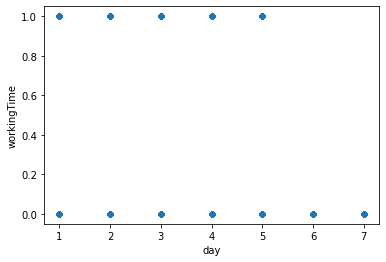

In [893]:
df_logins.plot(x = 'day', y = 'workingTime', kind = 'scatter')
plt.show()

Each kind of event is happend in both working time and non-working time

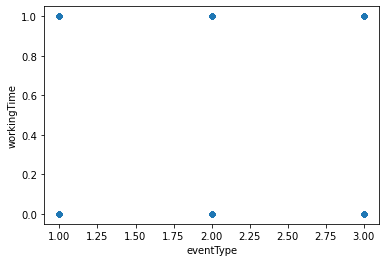

In [894]:
df_logins.plot(x = 'eventType', y = 'workingTime', kind = 'scatter')
plt.show()

Failed logins attempts occurred only for application ERM, HRW and TM3 

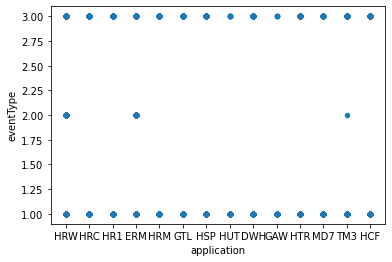

In [895]:
df_logins.plot(x = 'application', y = 'eventType', kind = 'scatter')
plt.show()

In [896]:
#remove attemps regarding applications with no errors associated
df_logins.drop(df_logins[df_logins["application"].isin(["ERM","HRW","TM3"]) == False].index ,inplace=True)
np.unique(df_logins["application"])

array(['ERM', 'HRW', 'TM3'], dtype=object)

### Series dataframe construction

In [897]:
# group by the userId
df_groupbyUserId = df_logins.groupby('userId')

In [898]:
# Retrieving users id
users_id = []
for key, value in df_groupbyUserId:
    users_id.append(key)

# Take userId having 0 or 1 login errors
userList = []

for i in users_id:
    user_group = df_groupbyUserId.get_group(i)
    ctr = user_group[user_group["eventType"] == FAILED_LOGIN].count()
    if ctr["eventType"] <= 1:
        userList.append(i)

In [899]:
# remove from the dataset all the users in userList
df_logins.drop(df_logins[df_logins["userId"].isin(userList)].index,inplace=True)

In [900]:
df_groupbyUserId = df_logins.groupby('userId')

In [901]:
# list of remaining userId 
users_id = [user for user in users_id if (user not in userList)]

userList.clear()

# getting all users having at least two login errors
for i in users_id:
    user_group = df_groupbyUserId.get_group(i)
    rowsNumber = len(user_group.index)
    j = 0
    while j < rowsNumber - 1:
        if user_group.iloc[j]["eventType"] == FAILED_LOGIN:
            k = j+1            
            while k < rowsNumber and user_group.iloc[k]["eventType"] != FAILED_LOGIN:
                k += 1
            if k == 1 or k != rowsNumber: # after a login error the user have other login errors (1 or more)
                userList.append(i)
                break
            j = k
        else:
            j += 1

In [902]:
# remove all users having only successful attempts after an error
df_logins.drop(df_logins[df_logins["userId"].isin(userList) == False].index,inplace=True)

In [903]:
df_groupbyUserId = df_logins.groupby('userId')

In [904]:
# list of remaining userId
users_id = [user for user in users_id if (user in userList)]

userList = []

# take all users who have at least 2 login errors in 24h
for i in users_id:
    user_group = df_groupbyUserId.get_group(i)
    rowsNumber = len(user_group.index)
    j = 0
    while j < rowsNumber - 1:
        if user_group.iloc[j]["eventType"] == FAILED_LOGIN:
            k = j+1          
            while k < rowsNumber and user_group.iloc[k]["eventType"] != FAILED_LOGIN:
                k += 1
            if k == 1 or k != rowsNumber:
                delta = int((user_group.iloc[k]["date"] - user_group.iloc[j]["date"]).total_seconds()) * 1000
                if delta < AT_LEAST_ONE_DAY:
                    userList.append(i) # save userId
                    break
            j = k
        else:
            j += 1


In [905]:
# remove all users who do not have 2 login errors in 24h
df_logins.drop(df_logins[df_logins["userId"].isin(userList) == False].index,inplace=True)

,userId,date,day,workingTime,eventType,application,ip
9684,17,2021-02-02 09:04:05,2,1,2,ERM,ip_4
9685,17,2021-02-02 09:04:05,2,1,1,ERM,ip_4
9692,17,2021-03-04 10:30:15,4,1,2,ERM,ip_4
9694,17,2021-03-04 10:30:15,4,1,1,ERM,ip_4
9698,17,2021-03-04 10:30:22,4,1,2,ERM,ip_4
9699,17,2021-03-04 10:30:22,4,1,1,ERM,ip_4
9687,17,2021-03-04 11:06:45,4,1,1,ERM,ip_4
9691,17,2021-03-04 11:06:45,4,1,2,ERM,ip_4
9693,17,2021-03-04 15:49:20,4,1,2,ERM,ip_4
9696,17,2021-03-04 15:49:20,4,1,1,ERM,ip_4


In [906]:
df_groupbyUserId = df_logins.groupby('userId')

In [907]:
# find sequences of login errors


# serie entry: (date, eventType, application, workingTime, day, ip if userMode else userId)
def buildCouple(group,i,userMode):
    return (group.iloc[i]["date"],group.iloc[i]["eventType"],
            group.iloc[i]["application"],group.iloc[i]["workingTime"],
            group.iloc[i]["day"],group.iloc[i]["ip"] if userMode else group.iloc[i]["userId"])

# store serie into dictionary
def saveSerie(user_idex,serie,storage):
    failureSeries = storage[user_idex]
    failureSeries.append(serie)
    storage[user_idex] = failureSeries

# find series of login errors for each user considering each application which has failed attempts
def findSeries(subjects,df_groupBySubject,storage,userMode):
    for i in subjects: # for each user
        subject_group = df_groupBySubject.get_group(i) # get login attempts for the user
        rowsNumber = len(subject_group.index) # get number of logins attempts
        storage[i] = [] # initialize user's value into dictionary
        for app in ["ERM", "HRW", "TM3"]: # for each app
            serie = [] # initializing empty serie
            j = 0
            while(j < rowsNumber): # for each login attempt
                # if the attempt is an error for the current app
                if(subject_group.iloc[j]["eventType"] == FAILED_LOGIN and subject_group.iloc[j]["application"] == app):
                    serie_len = len(serie)
                    if(serie_len == 0): #starting new serie
                        serie.append(buildCouple(subject_group,j,userMode))
                    else:
                        #check if the current failed attempts can be added to the current serie
                        dd = (subject_group.iloc[j]["date"] - serie[-1][0]).total_seconds() * 1000
                        # current failed attempts is occured within the maximum time window
                        if(dd <= MAX_DELAY_ERRORS):
                            serie.append(buildCouple(subject_group,j,userMode)) #append to the current serie
                        else:
                            saveSerie(user_idex=i,serie=serie,storage=storage) #save current serie
                            # start new serie appending the current failed attempt as first event
                            serie = [] 
                            serie.append(buildCouple(subject_group,j,userMode))
                            
                    k = j + 1
                    loginSuccess = False
                    eventFailure = False
                    while(k < (rowsNumber - 1) and not eventFailure and not loginSuccess): # searching for the next attempt
                        # if the attempt is successful
                        if (subject_group.iloc[k]["eventType"] == SUCCESSFUL_LOGIN and subject_group.iloc[k]["application"] == app): # login eseguito correttamente dopo un fallimento
                            loginSuccess = True
                        # else, if the attempt is an error
                        elif (subject_group.iloc[k]["eventType"] == FAILED_LOGIN and subject_group.iloc[k]["application"] == app):
                             eventFailure = True
                        k += 1

                    # for both event type
                    if(eventFailure or loginSuccess):
                        # compute the time intervall in milliseconds between the two attempts
                        #print(f"user {i}")
                        #print(f'k {subject_group.iloc[k]["date"]} j {subject_group.iloc[j]["date"]} = {int((subject_group.iloc[k]["date"] - subject_group.iloc[j]["date"]).total_seconds()) * 1000}')
                        delta = int((subject_group.iloc[k-1]["date"] - subject_group.iloc[j]["date"]).total_seconds()) * 1000

                        # in case the current failed attempt occurs in MAX_DELAY_ERRORS
                        if eventFailure and delta <= MAX_DELAY_ERRORS:
                            serie.append(buildCouple(subject_group,k-1,userMode)) # append to the current serie
                            j = k
                        # else
                        elif eventFailure and delta > MAX_DELAY_ERRORS:
                            saveSerie(user_idex=i,serie=serie,storage=storage) # save the current serie
                            serie = [] # starting a new serie
                            j = k-1
                            #serie.append(buildCouple(subject_group,k-1,userMode)) # append the attempt
                        # in case the current successful attempt occur in MAX_DELAY_SUCCESS
                        elif loginSuccess and delta <= MAX_DELAY_SUCCESS:
                            serie.append(buildCouple(subject_group,k-1,userMode)) # append it to the current serie for closing it
                            saveSerie(user_idex=i,serie=serie,storage=storage) # save the serie
                            serie = [] # starting a new serie
                            j = k
                        # else
                        elif loginSuccess and delta > MAX_DELAY_SUCCESS:
                            saveSerie(user_idex=i,serie=serie,storage=storage) # save the serie
                            serie = [] # starting a new one
                            j = k - 1
                    else:
                        j = k
                        

                # in case there is an open serie, it is closed
                # if successful attempt is found for the same application
                elif(len(serie) > 0 and subject_group.iloc[j]["application"] == serie[len(serie) - 1][2]): 
                    # check delay
                    delta = int((subject_group.iloc[j]["date"] - serie[len(serie) - 1][0]).total_seconds())* 1000
                    if(delta <  MAX_DELAY_SUCCESS):
                        serie.append(buildCouple(subject_group,j,userMode))
                    saveSerie(user_idex=i,serie=serie,storage=storage)
                    serie = []
                    j += 1
                else:
                    j += 1

            # when attempts are over, save the serie
            if(len(serie) > 0):
                saveSerie(user_idex=i,serie=serie,storage=storage)
                serie = [] 

In [908]:
#BUILDING USERS SERIES
"""
key: userId
value: list of failed attempts series
"""
failedAttemptsSeries = dict()
findSeries(subjects=userList,df_groupBySubject=df_groupbyUserId,storage=failedAttemptsSeries,userMode=True)

                    

In [909]:
"""
    Computing metrics metrics for a serie
    @return: list of tuple t
t = (key of the serie,average time between two attempts, failed attempts number, has success, application, amount)
"""
def computeMetrics(seriesStorage):
    seriesEvalIndex = [] # 
    for k in seriesStorage.keys():
        series = seriesStorage[k]
        for serie in series:
            length = len(serie)
            i = 0
            hasSuccess = False
            amount_item_set = set() #amount of used IP or amount of user for  IP
            amount_item_set.add(serie[0][-1])
            workingTime = 1
            delta = []
            while(i < length - 1):
                delta.append(int((serie[i+1][0] - serie[i][0]).total_seconds()) * 1000)
                amount_item_set.add(serie[i][-1])
                workingTime &= serie[i][3]
                i += 1
            hasSuccess = serie[-1][1] == 1
                    #only one fail attempt avg = 0
            t = (k, int(np.average(delta)) if len(delta) > 1 else 0  ,length - 1 if hasSuccess else length,1 if hasSuccess else 0,
                 serie[0][2],workingTime,serie[i][4],len(amount_item_set))
            seriesEvalIndex.append(t)
    return seriesEvalIndex

#### User series dataframe

In [910]:
#building users series dataframe 
seriesEvalIndex = computeMetrics(failedAttemptsSeries)
df_series = pd.DataFrame(seriesEvalIndex,columns=["userId","avgTime","failedAttempts","hasSuccess","application","workingTime","day","ipAmount"])
#delete series with just one log err and so average mean equal to 0
df_series.drop(df_series[ df_series["avgTime"] == 0 ].index,inplace=True)
df_series.describe()

,userId,avgTime,failedAttempts,hasSuccess,workingTime,day,ipAmount
count,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000
mean,17979.547944,51904.731544,3.886292,0.468179,0.803981,3.174651,1.021909
std,10759.405175,38773.347379,2.889793,0.499006,0.396999,1.702503,0.153088
min,18.000000,1000.000000,2.000000,0.000000,0.000000,1.000000,1.000000
25%,6271.000000,22500.000000,2.000000,0.000000,1.000000,2.000000,1.000000
50%,19984.000000,40000.000000,3.000000,0.000000,1.000000,3.000000,1.000000
75%,27595.000000,71071.000000,4.000000,1.000000,1.000000,5.000000,1.000000
max,33949.000000,282500.000000,43.000000,1.000000,1.000000,7.000000,5.000000


### Weighting functions interval for user series

In [912]:
df_series['suspicious'] = df_series.apply(lambda row : suspicious(row), axis=1)

In [913]:
df_series.describe()

,userId,avgTime,failedAttempts,hasSuccess,workingTime,day,ipAmount,suspicious
count,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000,12963.000000
mean,17979.547944,51904.731544,3.886292,0.468179,0.803981,3.174651,1.021909,0.488527
std,10759.405175,38773.347379,2.889793,0.499006,0.396999,1.702503,0.153088,0.320682
min,18.000000,1000.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.122744
25%,6271.000000,22500.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.122744
50%,19984.000000,40000.000000,3.000000,0.000000,1.000000,3.000000,1.000000,0.557377
75%,27595.000000,71071.000000,4.000000,1.000000,1.000000,5.000000,1.000000,0.746082
max,33949.000000,282500.000000,43.000000,1.000000,1.000000,7.000000,5.000000,0.999348


In [914]:
df_series.sort_values(by=['suspicious'])

,userId,avgTime,failedAttempts,hasSuccess,application,workingTime,day,ipAmount,suspicious
21531,19984,24500,2,1,ERM,1,1,1,0.122744
33660,29079,43000,2,1,ERM,1,1,1,0.122744
33672,29094,49666,3,1,ERM,1,1,1,0.122744
33677,29099,24500,2,1,ERM,1,5,1,0.122744
33701,29106,48000,2,1,ERM,1,4,1,0.122744
...,...,...,...,...,...,...,...,...,...
35100,30821,147375,9,0,ERM,0,7,2,0.992458
28711,25667,54500,7,0,ERM,0,7,2,0.992458
37789,32153,115714,8,0,ERM,0,6,2,0.992458
22039,20272,83250,33,0,ERM,1,1,5,0.993082


In [915]:
byApp = df_series[df_series["suspicious"] > 0.5].groupby(by=["application"])
tmp = byApp.userId.count()

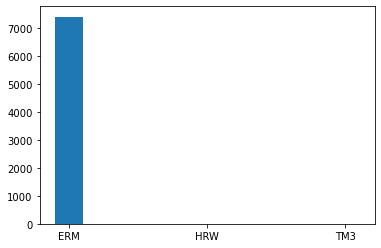

In [916]:
x = [k for k in tmp.keys()]
x.append("TM3")
y = [tmp[k] for k in tmp.keys()]
y.append(0)

plt.bar(x,y,width=0.2)
plt.title = "Most suspicious applcation"
plt.show()

From the graph we can say that in optics of cyber attacks it is not meaningful to be based on the working time  and day of the week, as we have suspicious series regardless of the parameters related to these factors.

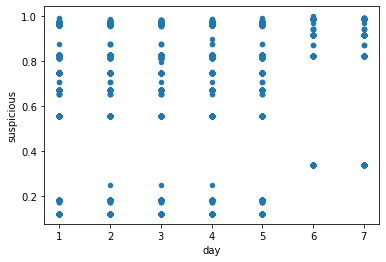

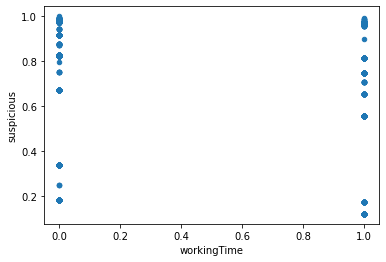

In [917]:
df_series.plot(x = 'day', y = 'suspicious', kind = 'scatter')
plt.show()
df_series.plot(x = 'workingTime', y = 'suspicious', kind = 'scatter')
plt.show()

Comparing amount of ip and failed attempts we can notice that with a single ip the number of failed attempts is bigger.
_It may indicate a presence of a target of an attack_. 
**Possible scenario**: attackers know the username of an employee and so they try guessing the password. 

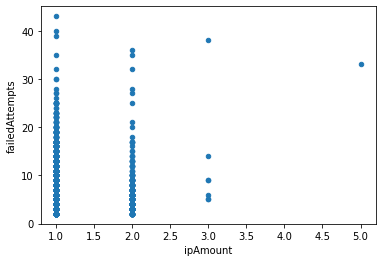

In [918]:
df_series.plot(x = 'ipAmount', y = 'failedAttempts', kind = 'scatter')
plt.show()

When the series of login attempts is closed with a successful attempts, the number of failed attempts is approximately the half respect to the complementary case.

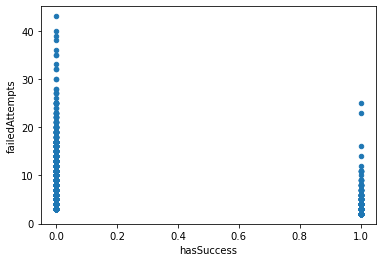

In [919]:
df_series.plot(x = 'hasSuccess', y = 'failedAttempts', kind = 'scatter')
plt.show()

The average time between login attempts and number of failures are approximately inversely proportional. Indeed _suspicious_ assumes values close to one when the average time gets shorter (the number of failed attempts gets larger).

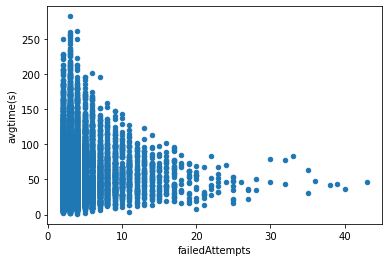

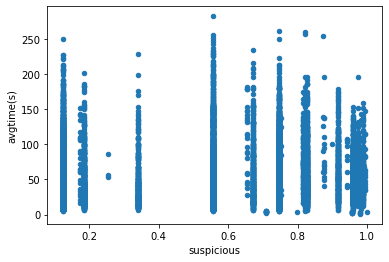

In [920]:
df_tmp = df_series.copy()
df_tmp["avgTime"] = df_tmp["avgTime"].apply(lambda x: int(x/1000))
df_tmp.plot(y="avgTime",x="failedAttempts",kind="scatter",ylabel="avgtime(s)")
df_tmp.plot(y="avgTime",x="suspicious",kind="scatter",ylabel="avgtime(s)")
plt.show()

<AxesSubplot:ylabel='userId'>

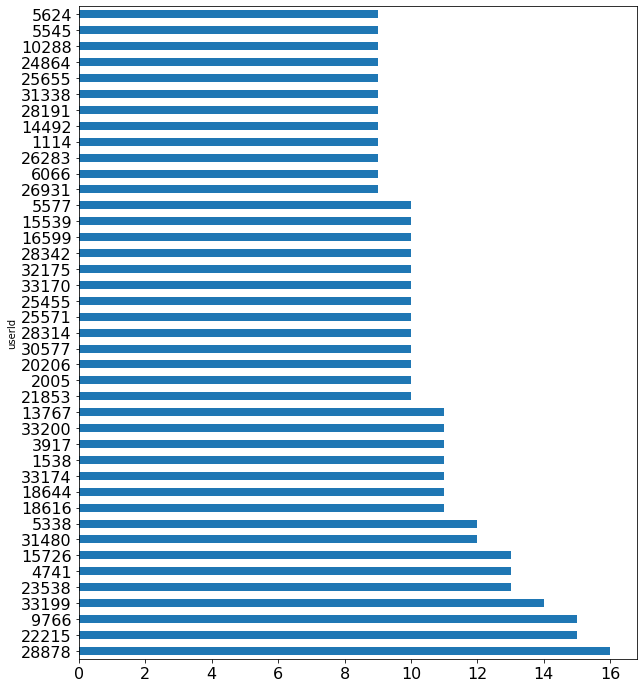

In [969]:
values = df_series['userId'].value_counts()
values = values[values > 8]
values.plot(kind='barh', figsize=(10,12), fontsize=16, ylabel="userId")
#values[values > 5]

**userId 28878** is the user with the highest number of failed attempt series

In [981]:
df_series[df_series['userId'] == 28878]

,userId,avgTime,failedAttempts,hasSuccess,application,workingTime,day,ipAmount,suspicious
33203,28878,11000,2,1,ERM,1,2,1,0.122744
33210,28878,7000,3,1,ERM,1,3,1,0.122744
33212,28878,7333,3,1,ERM,1,5,1,0.122744
33214,28878,6000,3,1,ERM,1,4,1,0.122744
33219,28878,8500,2,1,ERM,1,3,1,0.122744
33221,28878,9000,2,1,ERM,1,3,1,0.122744
33224,28878,10000,2,1,ERM,1,4,1,0.122744
33235,28878,14500,2,1,ERM,1,5,1,0.122744
33236,28878,8000,3,1,ERM,1,5,1,0.122744
33238,28878,9000,2,1,ERM,1,5,1,0.122744


Although user 28878 has the largest number of series, all are due to incorrect password entry as they are all ended with a success login, have a maximum length of three attempts, and a plausible average time for a human. Thus, relying on the number of series performed by a user can be misleading. Indeed, suspicious is low for each one.

## IP series analysis

In [921]:
failedAttemptsSeriesIP = dict()
df_logins.sort_values(by=["ip","date"],ascending=(True, True),inplace=True)
df_groupBy_ip = df_logins.groupby(by=["ip"])
df_groupBy_ip
ips = np.unique(df_logins["ip"])
findSeries(subjects=ips,df_groupBySubject=df_groupBy_ip,storage=failedAttemptsSeriesIP,userMode=False)

In [922]:
#computing metics
seriesEvalIndex = computeMetrics(failedAttemptsSeriesIP)
df_ip_series = pd.DataFrame(seriesEvalIndex,columns=["ip","avgTime","failedAttempts","hasSuccess","application","workingTime","day","userAmount"])
#delete series with just one log err and average mean equal to 0
df_ip_series.drop(df_ip_series[ df_ip_series["avgTime"] == 0 ].index,inplace=True)
df_ip_series['suspicious'] = df_ip_series.apply(lambda row : suspicious(row), axis=1)
df_ip_series.describe()

,avgTime,failedAttempts,hasSuccess,workingTime,day,userAmount,suspicious
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,51383.542688,3.826256,0.520634,0.807715,3.156848,1.076779,0.475255
std,39058.243315,2.851309,0.499593,0.394110,1.698882,0.389790,0.320932
min,1000.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.122744
25%,22000.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.122744
50%,39500.000000,3.000000,1.000000,1.000000,3.000000,1.000000,0.557377
75%,70073.750000,4.000000,1.000000,1.000000,5.000000,1.000000,0.746082
max,286500.000000,43.000000,1.000000,1.000000,7.000000,12.000000,0.999348


In [923]:
df_ip_series[df_ip_series["suspicious"] == df_ip_series["suspicious"].max()]

,ip,avgTime,failedAttempts,hasSuccess,application,workingTime,day,userAmount,suspicious
27027,ip_38662,4000,11,0,ERM,0,6,1,0.999348
34469,ip_5989,4142,8,0,ERM,0,6,1,0.999348


### Plotting amount weigths

#### Plotting weigth releated to ip used within a serie

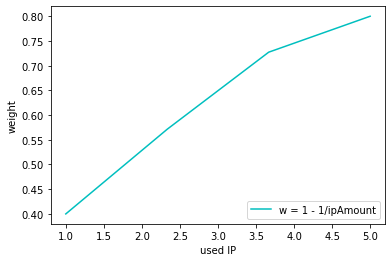

In [911]:
max_ip_amount = df_series["ipAmount"].max()
min_ip_amount = df_series["ipAmount"].min()
samples = max_ip_amount - min_ip_amount
x = np.linspace(start=min_ip_amount,stop=max_ip_amount,num=samples,endpoint=True)
y = []
for amount in x:
    y.append(1 - (1/amount if amount > 1 else 0.6))


plt.plot(x,y,'c',label="w = 1 - 1/ipAmount")
plt.xlabel("used IP")
plt.ylabel("weight")
plt.legend(loc='lower right')
plt.show()

#### Plotting weigth releated to the target users within a serie

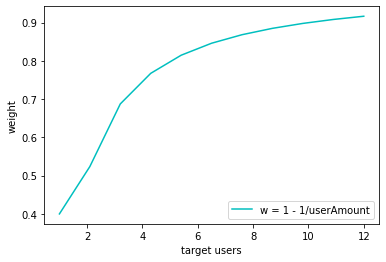

In [929]:
max_ip_amount = df_ip_series["userAmount"].max()
min_ip_amount = df_ip_series["userAmount"].min()
samples = max_ip_amount - min_ip_amount
x = np.linspace(start=min_ip_amount,stop=max_ip_amount,num=samples,endpoint=True)
y = []
for amount in x:
    y.append(1 - (1/amount if amount > 1 else 0.6))


plt.plot(x,y,'c',label="w = 1 - 1/userAmount")
plt.xlabel("target users")
plt.ylabel("weight")
plt.legend(loc='lower right')
plt.show()

**Observation**: The number of users within a series has a higher weigth than the number of used IP addresses on the *suspiciousness* of the series. Therefore, to detect an attack considering the failed attempt series tracking the IP address may be more meaningful.

### Plotting

When requests coming from the same IP are for different users, the average time between attempts decreases. 
Therefore, an attack is going on because the requests are being performed simultaneously.

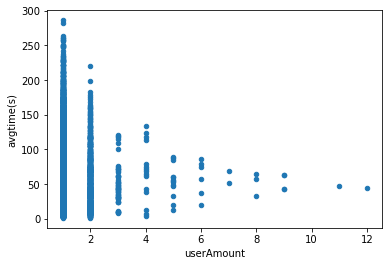

In [924]:
df_cp = df_ip_series.copy()
df_cp["avgTime"] = df_ip_series["avgTime"].apply(lambda x: int(x/1000))

df_cp.plot(x = 'userAmount', y = 'avgTime', kind = 'scatter',ylabel="avgtime(s)")
plt.show()

Looking at the number of failed attempts and of users, it can be observed that no correlation is present.

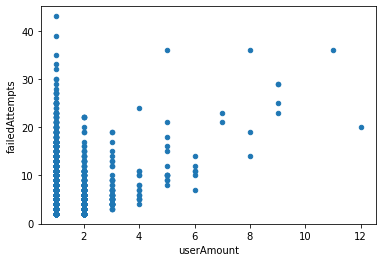

In [925]:
df_ip_series.plot(x = 'userAmount', y = 'failedAttempts', kind = 'scatter')
plt.show()

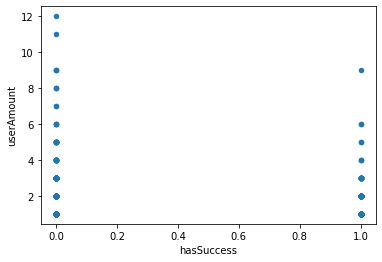

In [926]:
df_ip_series.plot(y = 'userAmount', x = 'hasSuccess', kind = 'scatter')
plt.show()

<AxesSubplot:ylabel='ip'>

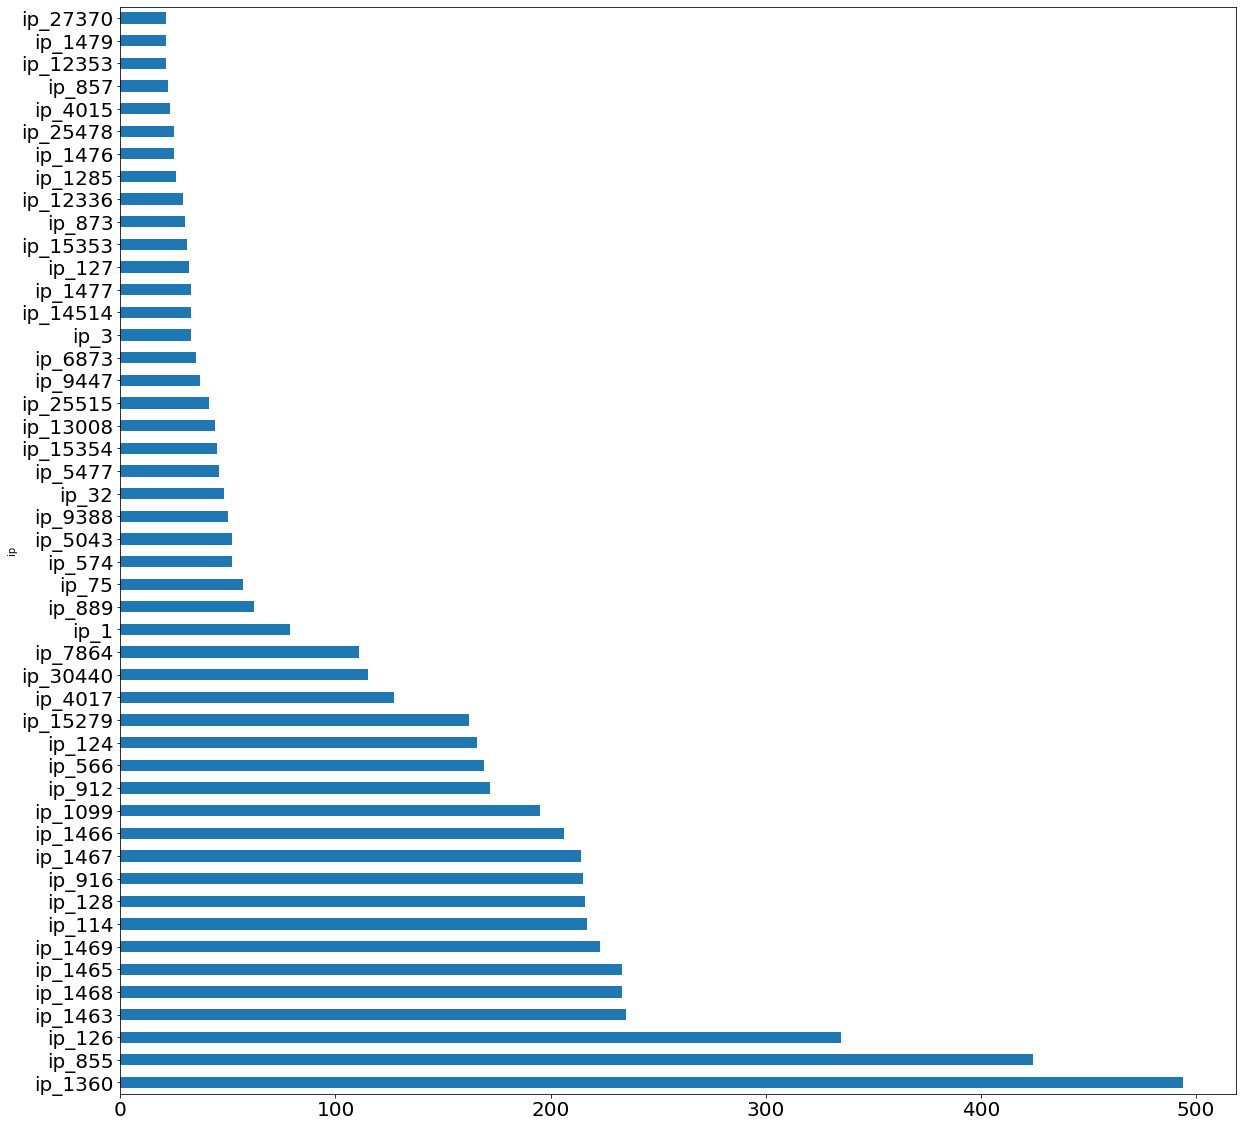

In [972]:
values = df_ip_series['ip'].value_counts()
values = values[values > 20]
values.plot(kind='barh', figsize=(20,20), fontsize=20,  ylabel="ip")

**ip_1360** is the IP with the highest number of failed attempt series

In [986]:
df_ip_series[df_ip_series['ip'] == 'ip_1360']['suspicious'].describe()

count    494.000000
mean       0.458877
std        0.335637
min        0.122744
25%        0.122744
50%        0.557377
75%        0.746082
max        0.996529
Name: suspicious, dtype: float64

Here the ip_1360 has the highest number of series and, accordingly to that, there are series with suspicious value up to (approximately) 0.997. Intuitively, looking at the most frequent incoming IP address may provide some knowledge about possible attacks.